# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# ***EDA***

In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001579,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## **checking null value**

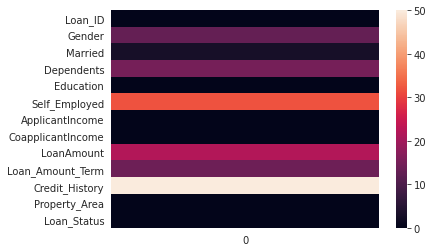

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
def rand_emputer(df,feature):
  ind=df.loc[df[feature].isnull()==True].index
  feat=df[feature].loc[df[feature].isnull()==False]
  val=feat.sample(len(ind))
  val.index=ind
  df[feature].loc[df[feature].isnull()]=val

In [ ]:
rand_emputer(df,'LoanAmount')

In [ ]:
rand_emputer(df,'Credit_History')

In [ ]:
rand_emputer(df,'Loan_Amount_Term')

In [ ]:
rand_emputer(df,'Self_Employed')

In [ ]:
rand_emputer(df,'Dependents')

In [ ]:
rand_emputer(df,'Gender')

In [ ]:
rand_emputer(df,'Married')

## **Data Formatting**

In [ ]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

## **Visualization**

In [ ]:
cat=[]
num=[]
count=df.nunique()
for i in df.columns:
  if df[i].dtype=='O' or count[i]<11:
    cat.append(i)
  else:
    num.append(i)

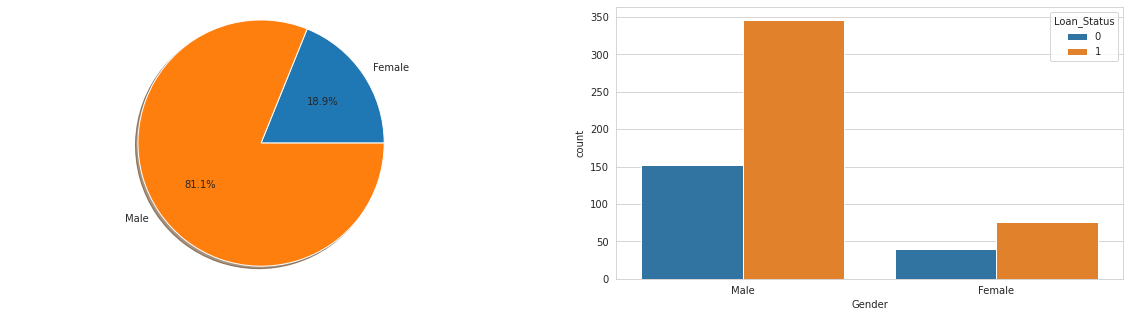

Male      0.694779
Female    0.655172
Name: Gender, dtype: float64


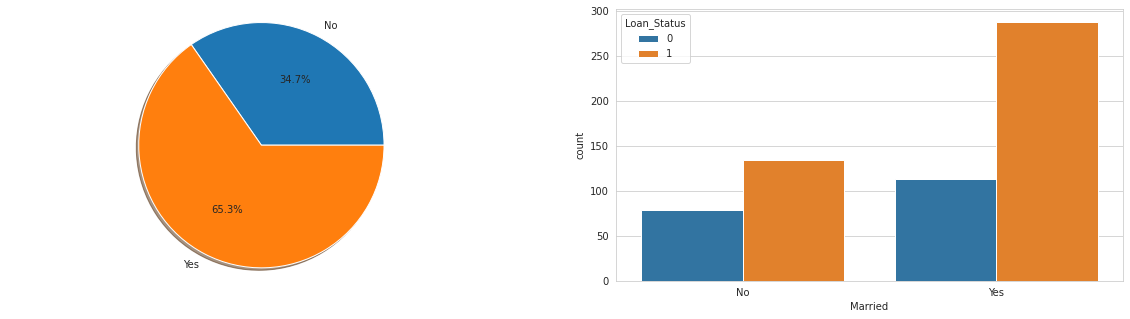

Yes    0.718204
No     0.629108
Name: Married, dtype: float64


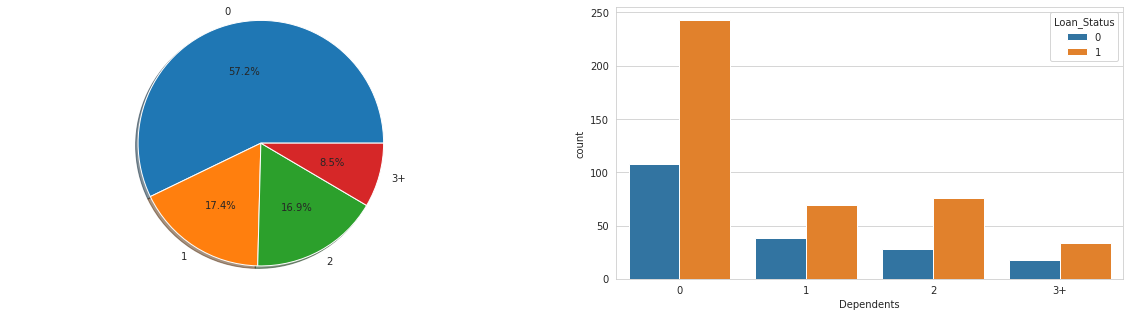

0     0.692308
1     0.644860
2     0.730769
3+    0.653846
Name: Dependents, dtype: float64


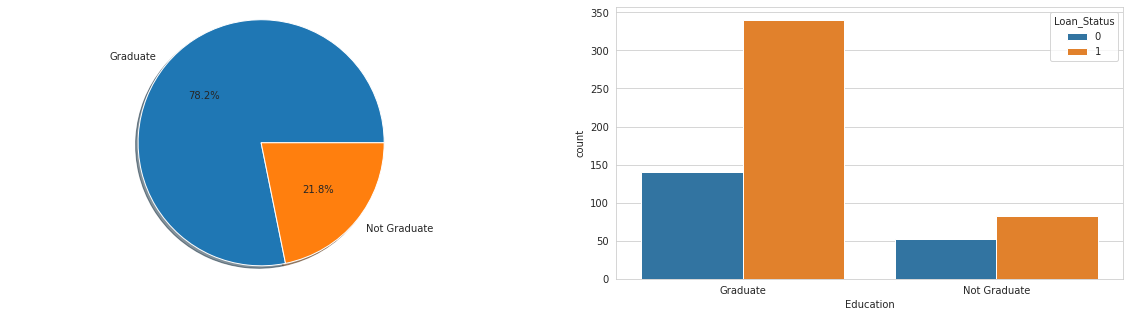

Graduate        0.708333
Not Graduate    0.611940
Name: Education, dtype: float64


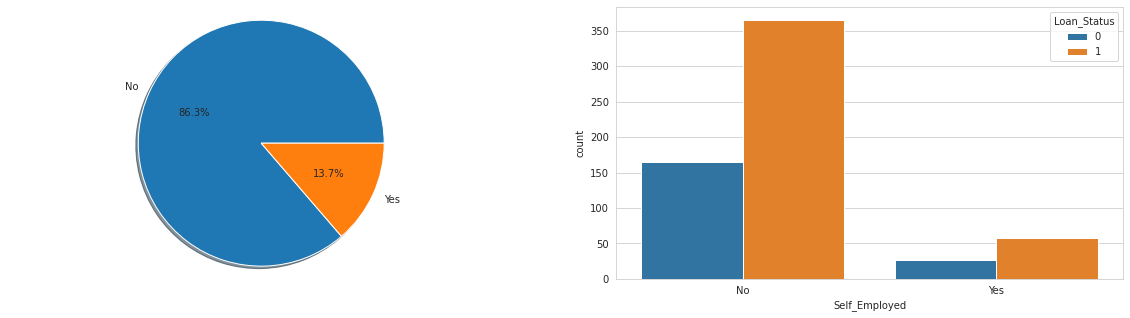

No     0.688679
Yes    0.678571
Name: Self_Employed, dtype: float64


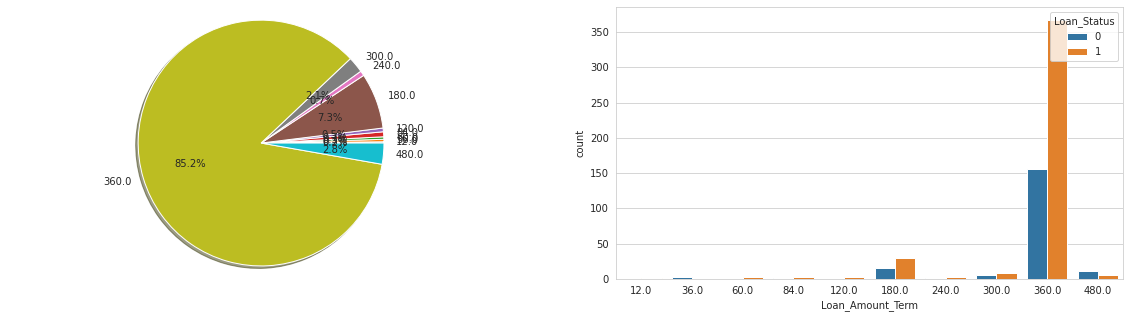

12.0     1.000000
36.0          NaN
60.0     1.000000
84.0     0.750000
120.0    1.000000
180.0    0.644444
240.0    0.750000
300.0    0.615385
360.0    0.701721
480.0    0.352941
Name: Loan_Amount_Term, dtype: float64


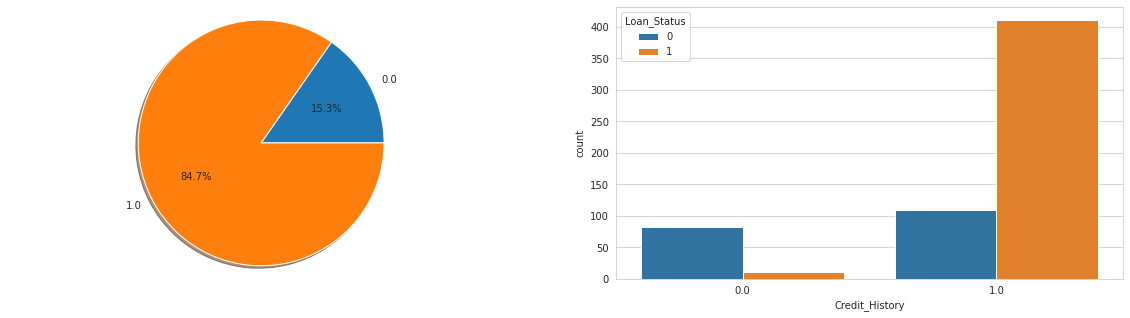

1.0    0.790385
0.0    0.117021
Name: Credit_History, dtype: float64


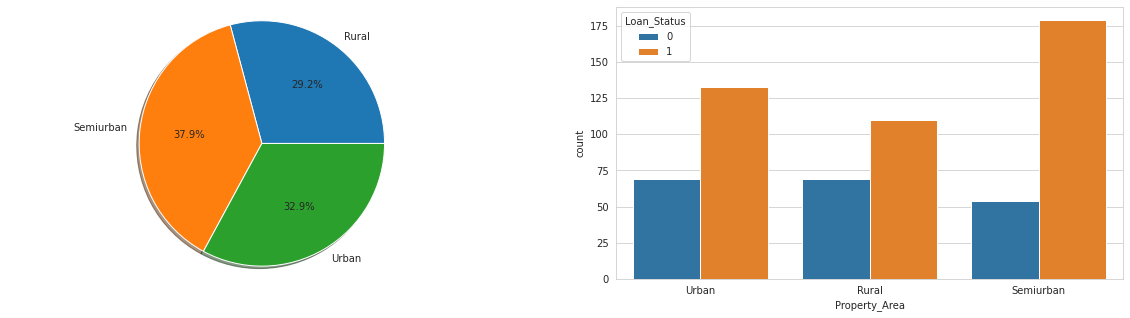

Semiurban    0.768240
Urban        0.658416
Rural        0.614525
Name: Property_Area, dtype: float64


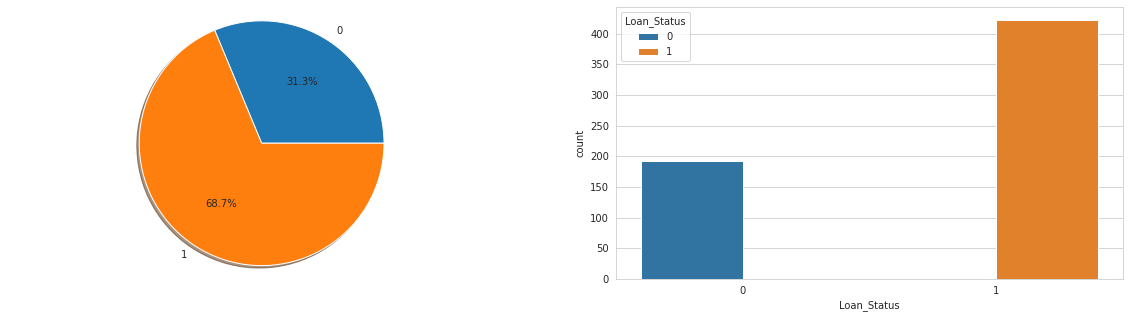

0    NaN
1    1.0
Name: Loan_Status, dtype: float64


In [ ]:

for i in cat:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2,hue='Loan_Status')
  #sns.violinplot(y='AveragePrice',x=i,data=df,hue='Attrition',split=True,ax=ax3)
  #plt.xticks(rotation=90) 
  plt.show()
  print(df[i].loc[df['Loan_Status']==1].value_counts()/df[i].value_counts())

1- Class data set is imbalanced. 

2- Property area,Education,Dependents,married have varince in loan approval rate

3-self_Employed and gender have almost no varince in approval rate 

4-Credit History and loan amount has very high variance 



In [ ]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in num:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=num)

In [ ]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True,hue='Loan_Status')
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

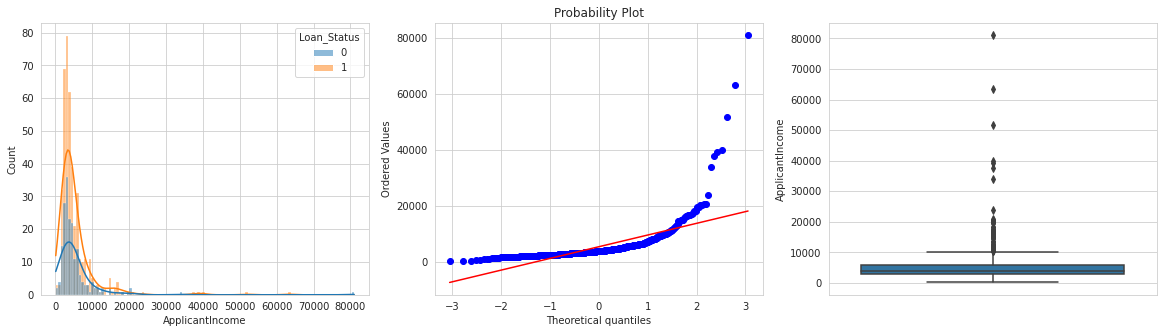

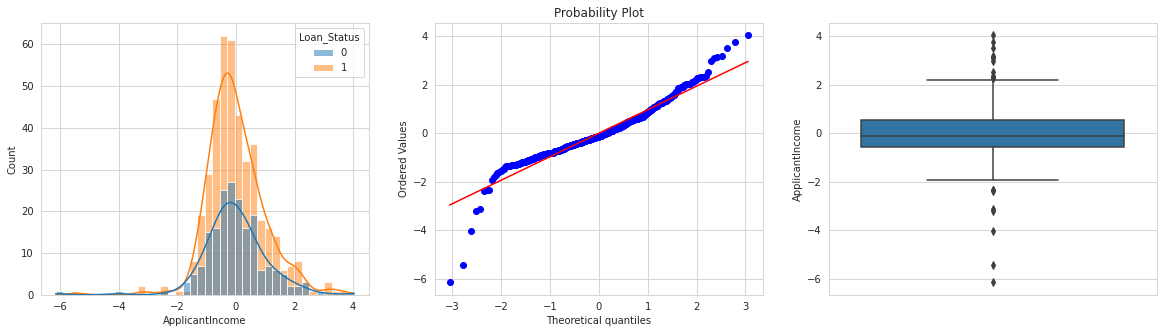

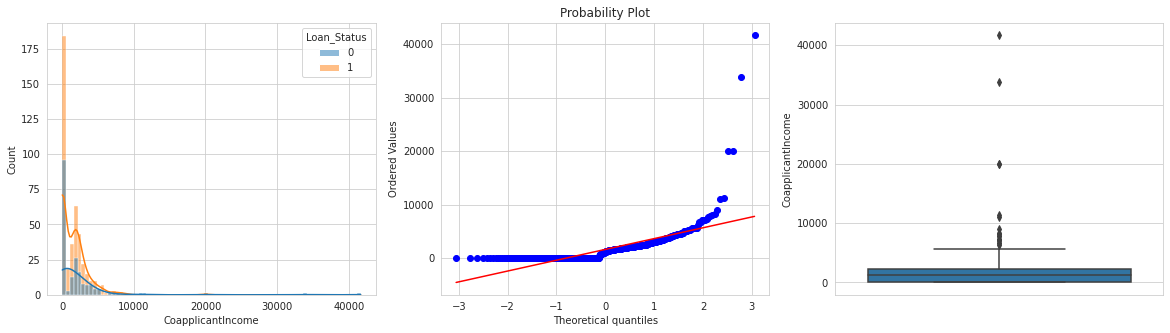

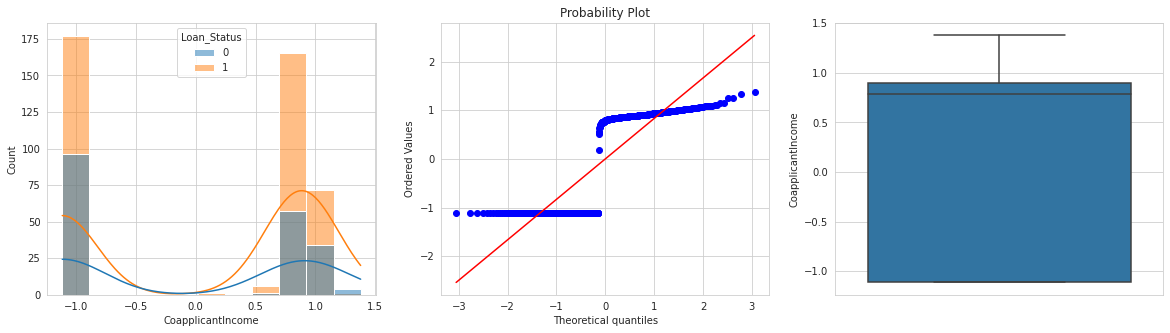

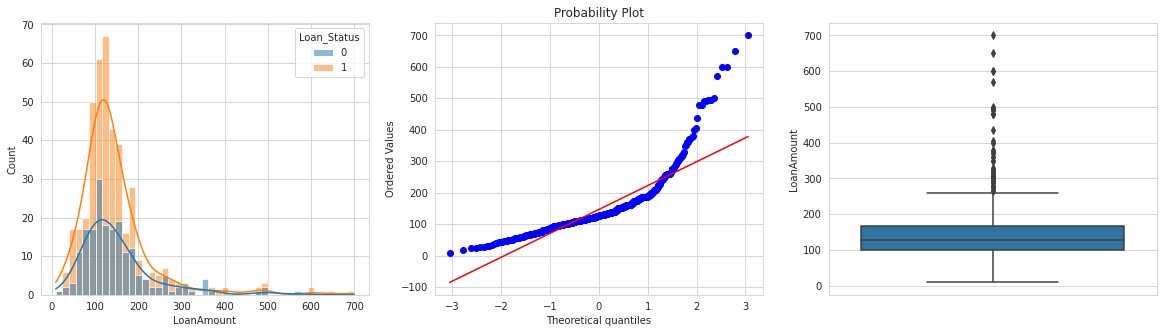

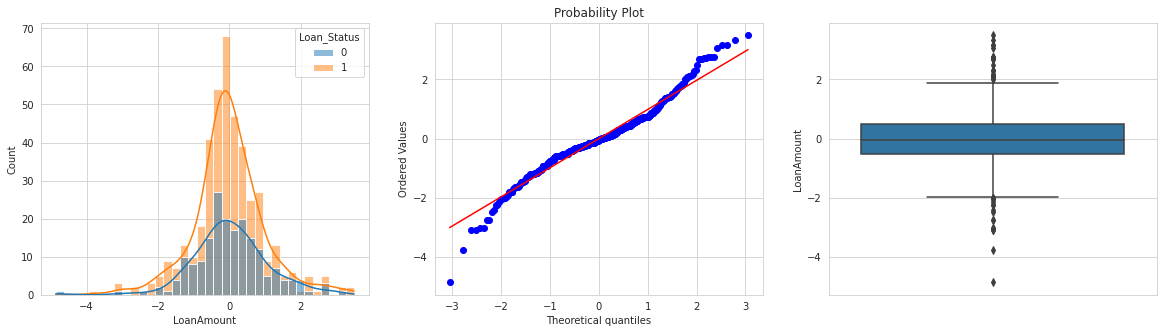

In [ ]:
import scipy.stats as stat
import pylab 
pt1=pd.DataFrame(pt1,columns=num)
pt2=pd.concat([pt1,df.Loan_Status],axis=1)
for i in num:
  pplot(df,i)
  pplot(pt2,i)

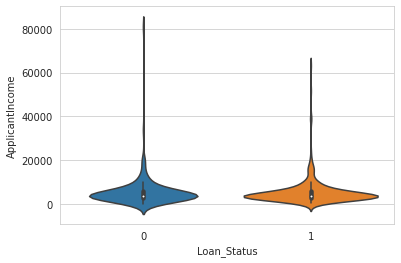

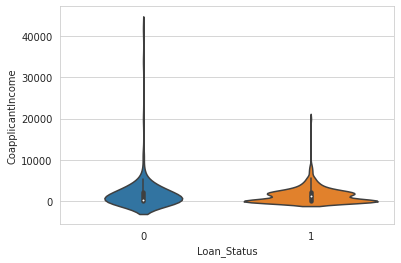

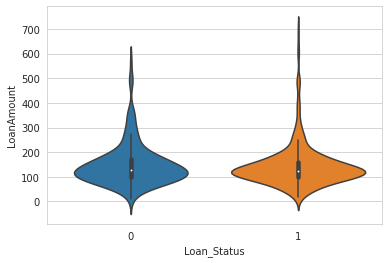

In [ ]:
for i in num:
  sns.violinplot(x='Loan_Status',y=i,data=df)
  plt.show()

Hiher the loan amount higher is the posiblity of geting loan

In [ ]:
df1=pd.concat([df.drop(num,axis=1),pt1],axis=1)

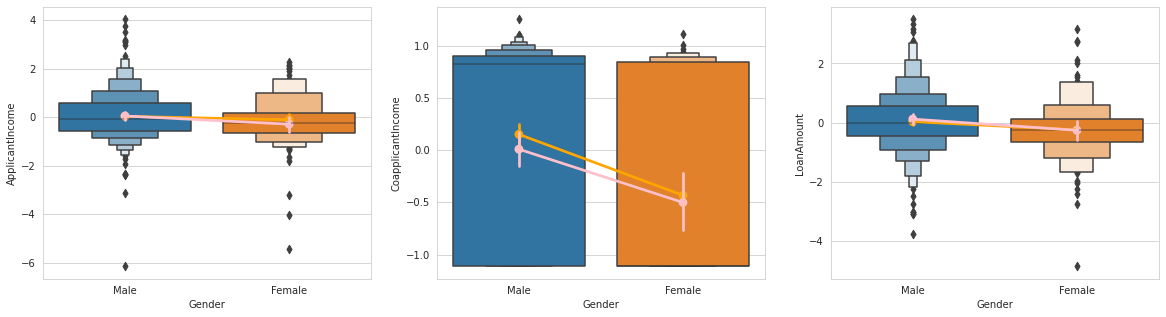

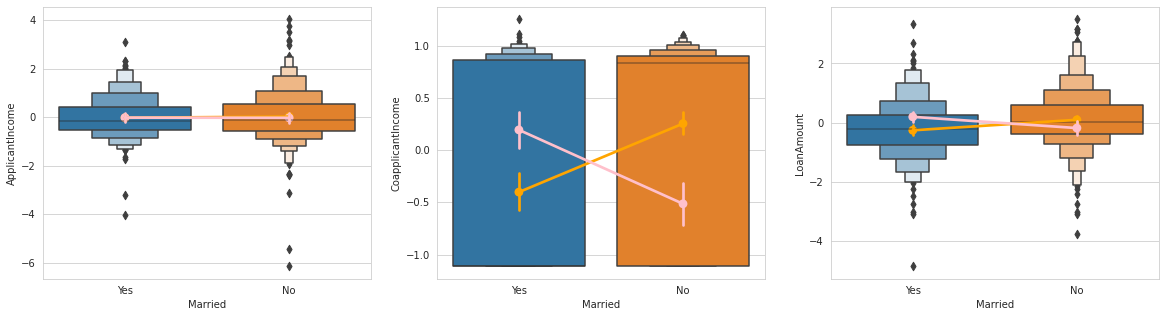

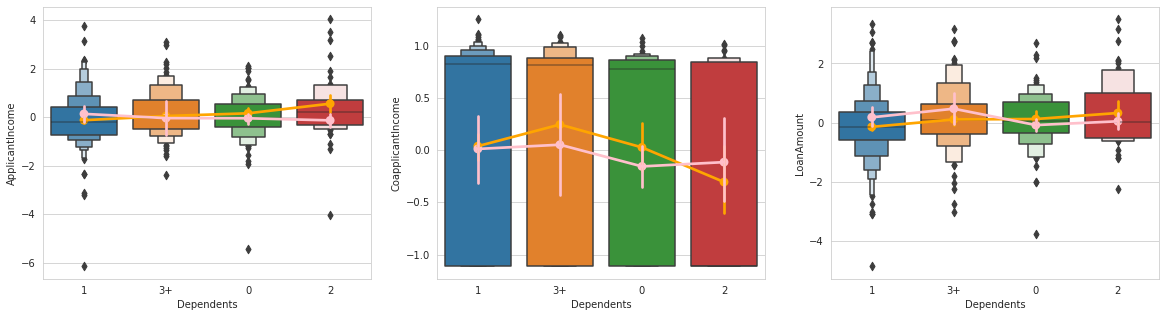

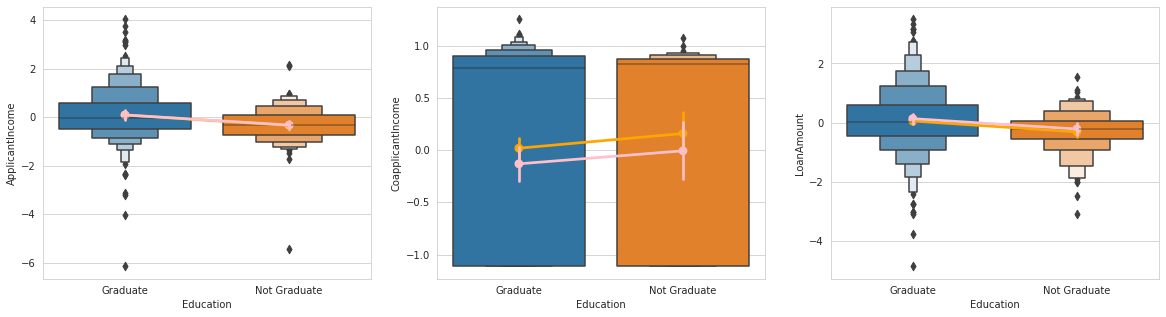

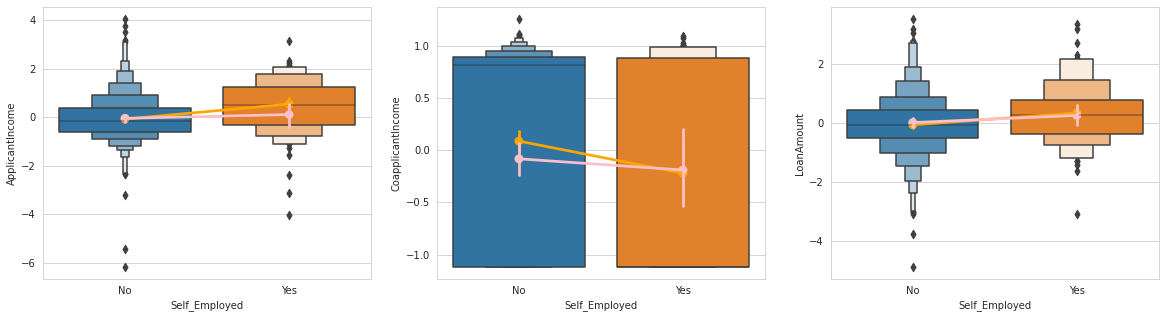

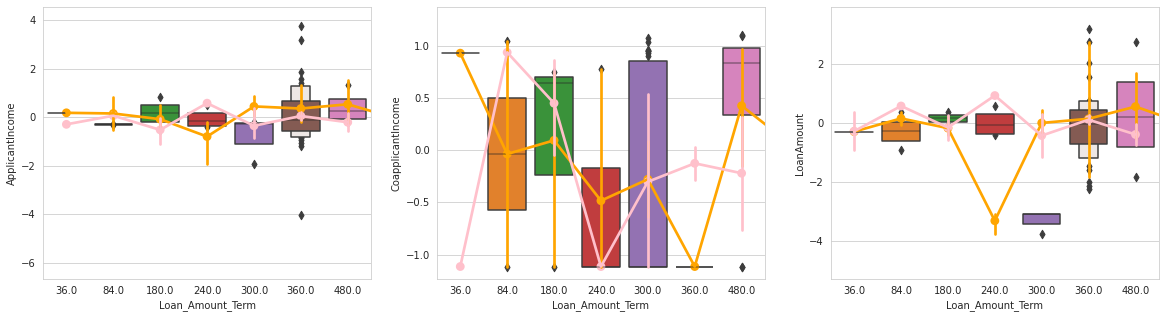

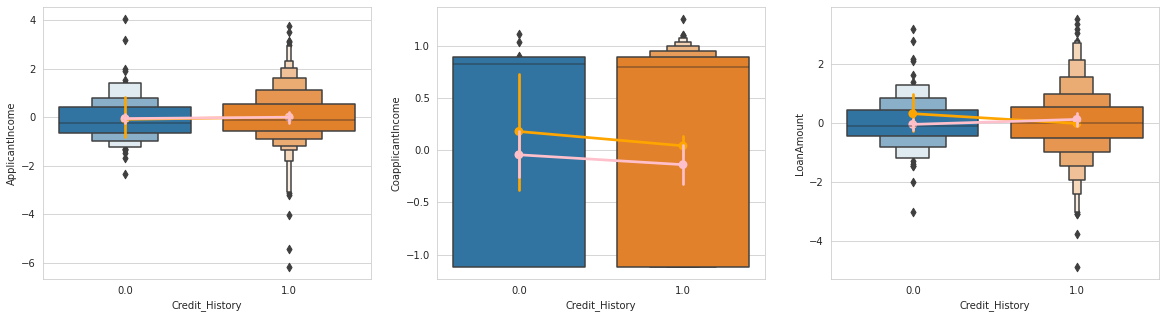

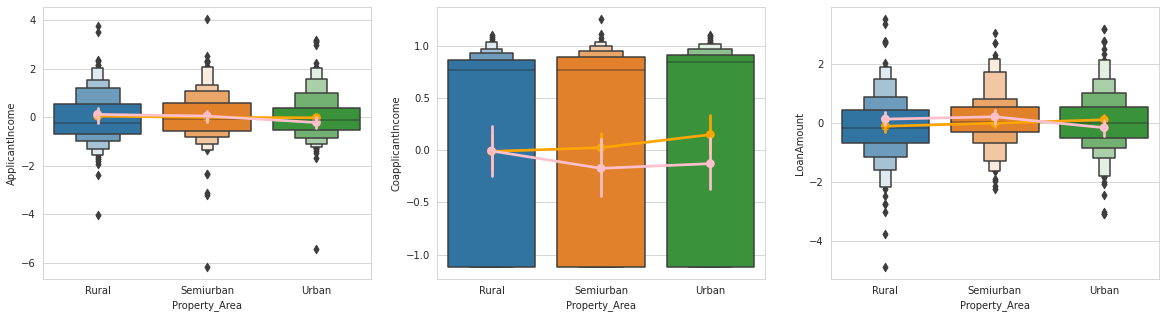

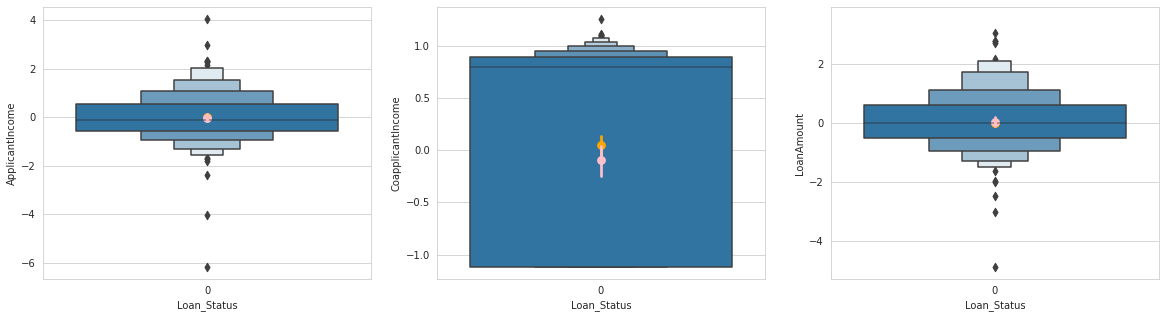

In [ ]:
for i in cat:
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  sns.boxenplot(x=i,y='ApplicantIncome',data=df1,ax=ax1)
  sns.pointplot(x=i,y='ApplicantIncome',data=df1.loc[df['Loan_Status']==1],ax=ax1,color='orange')
  sns.pointplot(x=i,y='ApplicantIncome',data=df1.loc[df['Loan_Status']==0],ax=ax1,color='pink')
  sns.boxenplot(x=i,y='CoapplicantIncome',data=df1.loc[df['Loan_Status']==1],ax=ax2)
  sns.pointplot(x=i,y='CoapplicantIncome',data=df1.loc[df['Loan_Status']==1],ax=ax2,color='orange')
  sns.pointplot(x=i,y='CoapplicantIncome',data=df1.loc[df['Loan_Status']==0],ax=ax2,color='pink')
  sns.boxenplot(x=i,y='LoanAmount',data=df1,ax=ax3)
  sns.pointplot(x=i,y='LoanAmount',data=df1.loc[df['Loan_Status']==1],ax=ax3,color='orange')
  sns.pointplot(x=i,y='LoanAmount',data=df1.loc[df['Loan_Status']==0],ax=ax3,color='pink')
  plt.show()



---
1. Married people co applicant salary should be higher than non married people for loan approval And married people apply for  more amount of loan then non married people

2. Candidate with 3 + dependents apply for or more amount of loan 

3. Applicant as self employed  and having higher income are more likely to Get the loan.

4. Applicant as Loan amount term 250 will get least amount of loan.

5. For loan applicant in urban areas co applicant salary should be higher 



---



---



## Genratin Feature

In [ ]:
df['pro']=1
temp_cat=[]
num=[]
count=df.nunique()
for i in df.columns:
  if count[i] <= 20 and df[i].dtype=='int64':
    temp_cat.append(i)
  elif df[i].dtype=="O":
    temp_cat.append(i)
  else:
    num.append(i)

In [ ]:
df['pro']=1
def per_cat(df,feature,k,l):
  per_list=[]
  no_per_list=[]
  
  for i in df[feature].unique():
    temp=df.loc[df[feature]==i]
    per=(temp[feature].loc[temp['Loan_Status']==0].count()/temp[feature].count())*100
    no_per=(temp[feature].loc[temp['Loan_Status']==1].count()/temp[feature].count())*100
    #print('% of >50K income when '+str(feature)+' is '+str(i)+' and '+str(l)+' is '+str(k)+' = '+str(per))
    per_list.append(per)
    no_per_list.append(no_per)
    if per>=40:
      temp['pro'].loc[temp[feature]==i]=1
    else:
      temp['pro'].loc[temp[feature]==i]=0
    df.loc[df[feature]==i]=temp
  #plt.figure(figsize=(7,5),clear=True)
  #plt.subplot(1,2,1)
  #plt.bar(x=df[feature].unique(),height=per_list)
  #plt.subplot(1,2,2)
  #plt.bar(x=df[feature].unique(),height=no_per_list,color='r')
  #plt.show()
  #plt.xlabel(str(feature)+" when "+str(l)+" is "+str(k))
  per_list=[]
  return(df)


DataFrame new_feature is reflecting the relation of union of  two categorical variable and output


In [ ]:
new_feature=pd.DataFrame()
temp_cat.remove('Loan_Status')
temp_cat.remove('pro')
for i in temp_cat:
  for j in temp_cat:
    if i != j:
      for k in df[i].unique():
        temp=df.loc[df[i]==k]
        #sns.countplot(x=j,data=temp)
        #plt.show()
        temp=per_cat(temp,j,k,i)
        df.loc[df[i]==k]=temp
      new_feature[i+'_'+j]=df['pro']

        
  temp_cat.remove(i)


In [ ]:
nf=new_feature.T.drop_duplicates(subset=None, keep='first', inplace=False).T

In [ ]:
nf['total']=nf.sum(axis=1)

In [ ]:
nf.drop('Gender_Married',axis=1,inplace=True)

## **Encoding**:- 

In [ ]:
df_cat=pd.DataFrame(columns=['Loan_Amount_Term'])
df_e=df.loc[df['Loan_Status']==1]
df_p=df.loc[df['Loan_Status']==0]
df_encoding=pd.DataFrame(df,copy=True)
for i in df_cat.columns:
  for j in df[i].unique():
    per_e=(df_e[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    per_p=(df_p[i].loc[df[i]==j].count()/df[i].loc[df[i]==j].count())*100
    df_encoding[i].loc[df_encoding[i]==j]=per_p
  
    
#df_cat['diff']=(df_cat['percent_e']-df_cat['percent_p']).abs()




In [ ]:
cat.remove('Loan_Amount_Term')

In [ ]:
df_encoding=pd.concat([pd.get_dummies(df_encoding[cat]),df_encoding['Loan_Amount_Term'],nf,pt1],axis=1)

In [ ]:
df_encoding.head()

,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,Gender_Dependents,Gender_Self_Employed,Gender_Property_Area,Dependents_Married,Dependents_Education,Dependents_Self_Employed,Dependents_Property_Area,Self_Employed_Married,Self_Employed_Education,Self_Employed_Property_Area,total,ApplicantIncome,CoapplicantIncome,LoanAmount
0,1.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,29.827916,0,0,0,0,0,0,0,0,0,0,0,0.544127,-1.113960,-0.214212
1,1.0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,29.827916,0,0,0,0,0,0,1,0,0,0,1,0.170811,0.826609,-0.021082
2,1.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,29.827916,0,0,0,0,0,0,0,0,0,1,1,-0.499934,-1.113960,-1.299665
3,1.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,29.827916,0,0,0,0,1,0,0,0,0,0,1,-0.743757,0.897047,-0.147825
4,1.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,29.827916,0,0,0,0,0,0,0,0,0,0,0,0.582611,-1.113960,0.169767


## **Changing Data type**

In [ ]:
df_encoding=df_encoding.astype(float)

In [ ]:
x=df_encoding.drop('Loan_Status',axis=1)
y=df_encoding['Loan_Status']

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)
x["Cluster"] = kmeans.predict(x)

In [ ]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Credit_History               614 non-null    float64
 1   Loan_Status                  614 non-null    float64
 2   Gender_Female                614 non-null    float64
 3   Gender_Male                  614 non-null    float64
 4   Married_No                   614 non-null    float64
 5   Married_Yes                  614 non-null    float64
 6   Dependents_0                 614 non-null    float64
 7   Dependents_1                 614 non-null    float64
 8   Dependents_2                 614 non-null    float64
 9   Dependents_3+                614 non-null    float64
 10  Education_Graduate           614 non-null    float64
 11  Education_Not Graduate       614 non-null    float64
 12  Self_Employed_No             614 non-null    float64
 13  Self_Employed_Yes   

## **Correlation**

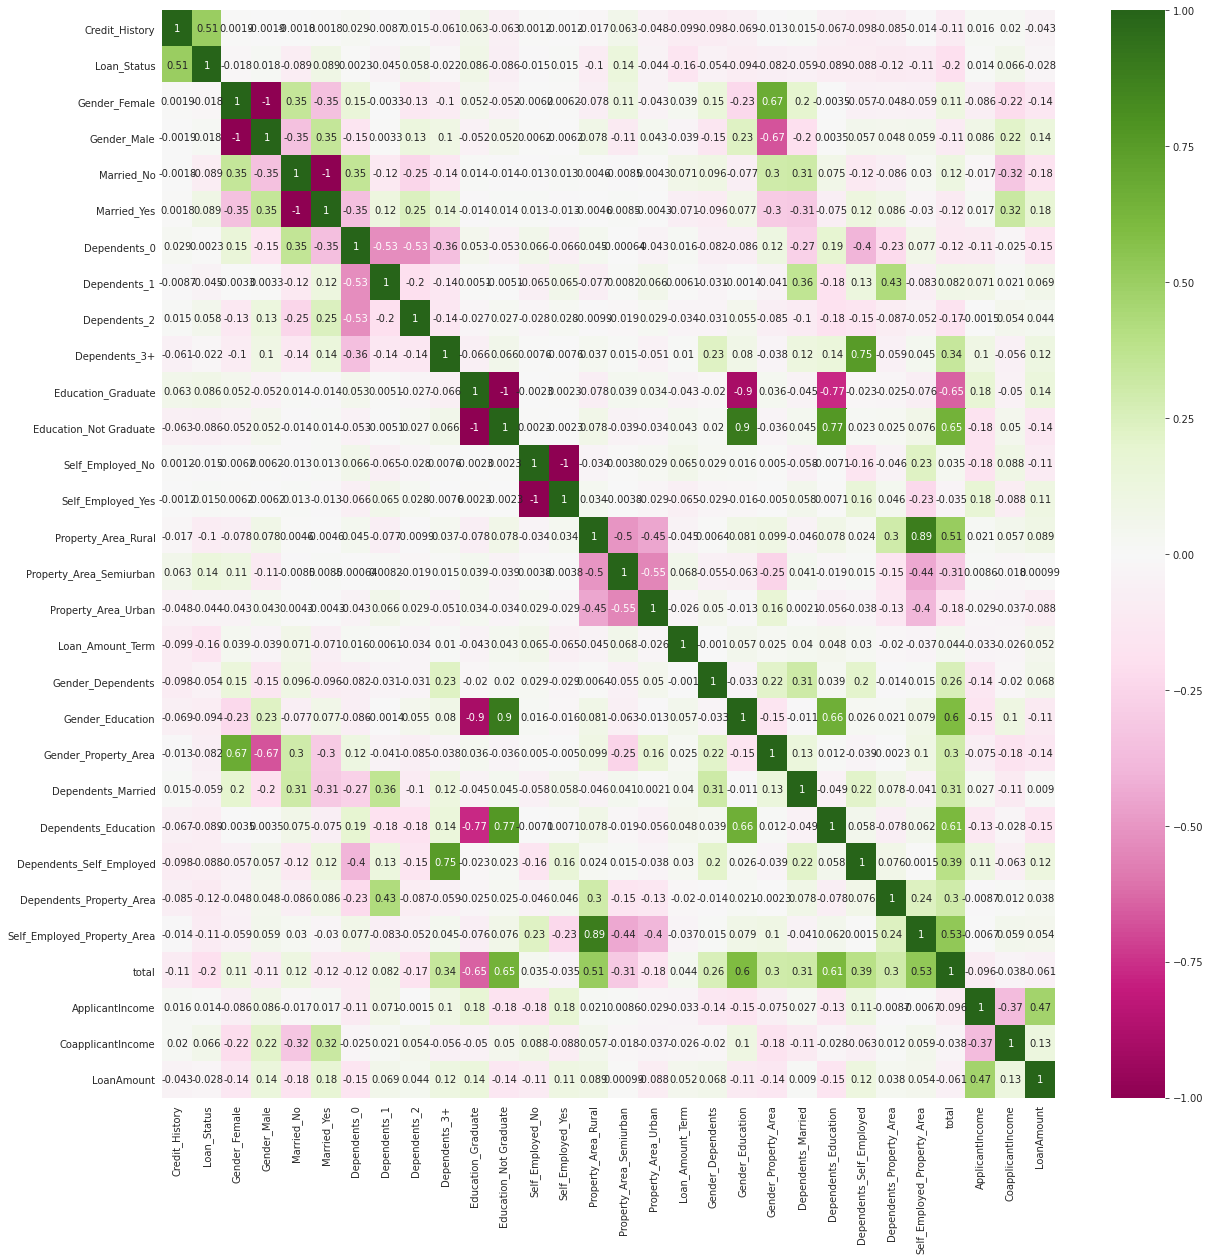

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_encoding.corr(),annot=True,cmap='PiYG')

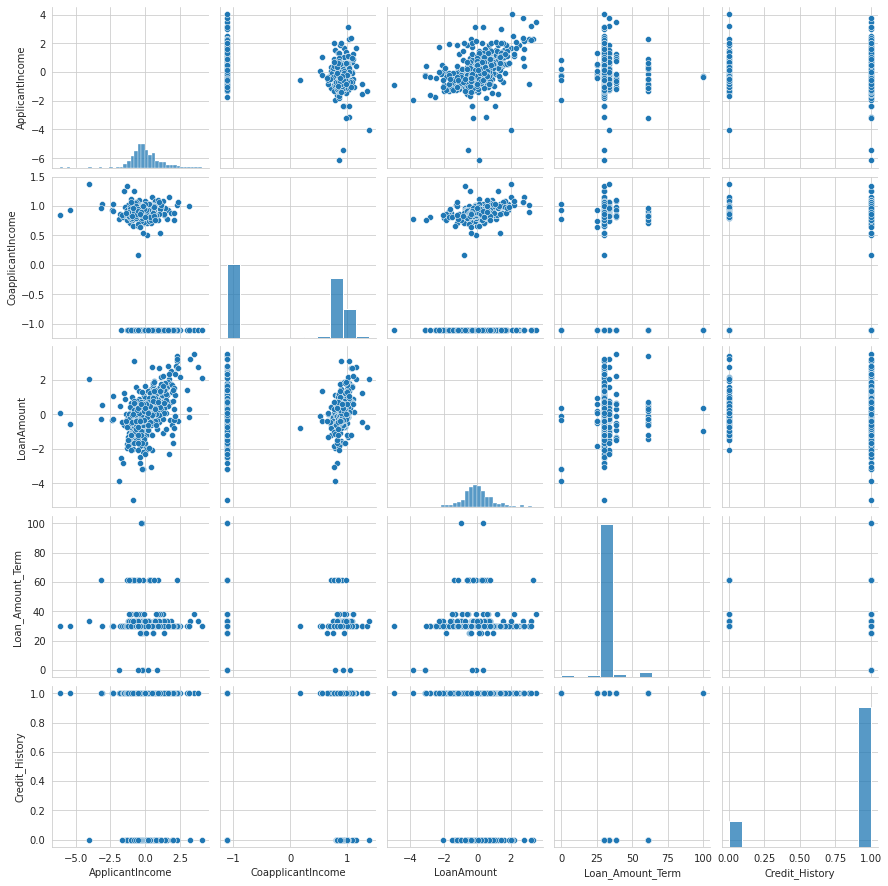

In [ ]:
sns.pairplot(df_encoding[num])

## **chi-square test**

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
s = SelectKBest(chi2, k=12)
s.fit(x.drop(num,axis=1),y)

SelectKBest(k=12, score_func=<function chi2 at 0x7fd9f248d3b0>)

In [ ]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.drop(num,axis=1).columns).T.sort_values(by=0)

,0,1
Dependents_0,0.001359,9.705914e-01
Self_Employed_No,0.020381,8.864772e-01
Gender_Male,0.038770,8.439053e-01
Self_Employed_Yes,0.121825,7.270638e-01
Gender_Female,0.168228,6.816919e-01
Dependents_3+,0.270723,6.028471e-01
Property_Area_Urban,0.783946,3.759370e-01
Education_Graduate,0.988390,3.201361e-01
Dependents_1,1.037133,3.084892e-01
Married_Yes,1.697853,1.925690e-01


## **Separating dependent and independent variables**

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [ ]:
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[num]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('Loan_Status',axis=1)
  y_z=df_z.Loan_Status
  return(x_z,y_z)

In [ ]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 0.9365942028985508


In [ ]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(x_train_scaler, y_train)
y_pred=clf_lr.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
lr_acc=f1_score(y_test,y_pred)

[[ 7 14]
 [ 1 40]]
0.7580645161290323
              precision    recall  f1-score   support

         0.0       0.88      0.33      0.48        21
         1.0       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf_lr, ss.transform(x), y, cv=10,scoring='f1')

lr_score=cv_results['test_score'].mean()



In [ ]:
lr_score

0.8658856990047459

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
clf_rfc = RFC().fit(x_train, y_train)
y_pred=clf_rfc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
rfc_acc=f1_score(y_test,y_pred)

[[ 7 14]
 [ 2 39]]
0.7419354838709677
              precision    recall  f1-score   support

         0.0       0.78      0.33      0.47        21
         1.0       0.74      0.95      0.83        41

    accuracy                           0.74        62
   macro avg       0.76      0.64      0.65        62
weighted avg       0.75      0.74      0.71        62



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFC(), x, y, cv=10,scoring='f1')

rfc_score=cv_results['test_score'].mean()


## **XGB Classifier**

In [ ]:

from xgboost import XGBClassifier as XBC
xgc=XBC().fit(x_train,y_train)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgc_acc=f1_score(y_test,y_pred)

[[ 8 13]
 [ 2 39]]
0.7580645161290323
              precision    recall  f1-score   support

         0.0       0.80      0.38      0.52        21
         1.0       0.75      0.95      0.84        41

    accuracy                           0.76        62
   macro avg       0.78      0.67      0.68        62
weighted avg       0.77      0.76      0.73        62



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(), x, y, cv=10,scoring='f1')

xgc_score=cv_results['test_score'].mean()




## **Ada Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ABC 
abc=ABC().fit(x_train,y_train)

y_pred = abc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
abc_acc=f1_score(y_test,y_pred)

[[ 8 13]
 [ 4 37]]
0.7258064516129032
              precision    recall  f1-score   support

         0.0       0.67      0.38      0.48        21
         1.0       0.74      0.90      0.81        41

    accuracy                           0.73        62
   macro avg       0.70      0.64      0.65        62
weighted avg       0.72      0.73      0.70        62



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ABC(), x, y, cv=10,scoring='f1')

abc_score=cv_results['test_score'].mean()



## **Extra Tree Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as ETC 

etc = ETC(random_state=123)
etc.fit(x_train, y_train)
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
etc_acc=f1_score(y_test,y_pred)

[[ 7 14]
 [ 4 37]]
0.7096774193548387
              precision    recall  f1-score   support

         0.0       0.64      0.33      0.44        21
         1.0       0.73      0.90      0.80        41

    accuracy                           0.71        62
   macro avg       0.68      0.62      0.62        62
weighted avg       0.70      0.71      0.68        62



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETC(), x, y, cv=10,scoring='f1')

etc_score=cv_results['test_score'].mean()


## **Support vector classifier**

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=123)
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
svc_acc=f1_score(y_test,y_pred)

[[ 9 12]
 [ 3 38]]
0.7580645161290323
              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55        21
         1.0       0.76      0.93      0.84        41

    accuracy                           0.76        62
   macro avg       0.76      0.68      0.69        62
weighted avg       0.76      0.76      0.74        62



In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVC(), ss.transform(x), y, cv=10,scoring='f1')

svc_score=cv_results['test_score'].mean()


## **Comparing models**

In [ ]:
score=[lr_score,rfc_score,xgc_score,etc_score,svc_score]
error=[lr_acc,rfc_acc,xgc_acc,etc_acc,svc_acc]
name=['LR','RFC','XGB','ETC','SVC']
diff=[]
for i in range(5):
  diff.append(score[i]-error[i])
pd.DataFrame([name,score,error,diff]).T

,0,1,2,3
0,LR,0.865886,0.842105,0.0237804
1,RFC,0.840878,0.829787,0.0110903
2,XGB,0.852161,0.83871,0.0134509
3,ETC,0.817031,0.804348,0.0126832
4,SVC,0.856659,0.835165,0.0214944


XGB should be selected because of high score and low diff

# Over-Sampeling

In [ ]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(1)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)

x_train_ns=pd.DataFrame(x_train_ns)
x_train_ns.columns=x_train.columns
xgc=XBC().fit(x_train_ns,y_train_ns)

y_pred = xgc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgc_acc=f1_score(y_test,y_pred)

[[ 7 14]
 [ 2 39]]
0.7419354838709677
              precision    recall  f1-score   support

         0.0       0.78      0.33      0.47        21
         1.0       0.74      0.95      0.83        41

    accuracy                           0.74        62
   macro avg       0.76      0.64      0.65        62
weighted avg       0.75      0.74      0.71        62



In [ ]:
from imblearn.ensemble import EasyEnsemble
from sklearn.ensemble import VotingClassifier
def esy_ens(model,x_train,y_train,x_test,y_test):
  ee=EasyEnsemble(random_state=42,n_subsets=4)
  x_train_ns,y_train_ns=ee.fit_sample(x_train,y_train)
  estimator = []
  y_p=pd.DataFrame()
  for i in range(4):
    x_train_ns1=pd.DataFrame(x_train_ns[i])
    x_train_ns1.columns=x_train.columns
    xgc=model.fit(x_train_ns1,y_train_ns[i])
    y_p = pd.concat([pd.DataFrame(xgc.predict(x_test)),y_p],axis=1,ignore_index=True)
  k=[]
  y_p['sum']=y_p.sum(axis=1)
  for i in y_p.index:
    if y_p['sum'][i]>2:
      k.append(1)
    else:
      k.append(0)
  y_pred=k
  from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
  from sklearn.metrics import f1_score
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  return(y_pred)



# **Hyper-parameter tuning** 

## **XG Boost**(0.878)




In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [1,3,5],
    'reg_lambda': [10,12,15],
    'base_score': [0.05,0.1,0.2]
}

xg_grid = GridSearchCV(XBC(n_jobs=-1), params, n_jobs=-1, cv=3,scoring='roc_auc')
xg_grid.fit(x, y)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.7647222486068896
Best score: {'base_score': 0.1, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 3, 'reg_lambda': 10}
Best score: XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=3, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBC(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=3, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), x, y, cv=10)

cv_results['test_score'].mean()

0.7998413537810681

In [ ]:
xbc = XBC(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#esy_ens(xbc)

xbc.fit(x_train,y_train)

y_pred = xbc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
svc_acc=accuracy_score(y_test,y_pred)

[[ 7 14]
 [ 1 40]]
0.7580645161290323
              precision    recall  f1-score   support

         0.0       0.88      0.33      0.48        21
         1.0       0.74      0.98      0.84        41

    accuracy                           0.76        62
   macro avg       0.81      0.65      0.66        62
weighted avg       0.79      0.76      0.72        62



# **Best Model Evaluation**

In [ ]:
model= XBC(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

y_pred=esy_ens(model,x_train,y_train,x_test,y_test)
'''
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, ss.transform(x), y, cv=10)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(accuracy_score(y,y_pred))
print(classification_report(y,y_pred))'''


[[12  9]
 [10 31]]
0.6935483870967742
              precision    recall  f1-score   support

         0.0       0.55      0.57      0.56        21
         1.0       0.78      0.76      0.77        41

    accuracy                           0.69        62
   macro avg       0.66      0.66      0.66        62
weighted avg       0.70      0.69      0.70        62



'\nfrom sklearn.model_selection import cross_val_predict\ny_pred = cross_val_predict(model, ss.transform(x), y, cv=10)\nfrom sklearn.metrics import accuracy_score,confusion_matrix,classification_report\nprint(confusion_matrix(y,y_pred))\nprint(accuracy_score(y,y_pred))\nprint(classification_report(y,y_pred))'

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x, y, cv=10)

cv_results['test_score']

array([0.80645161, 0.82258065, 0.74193548, 0.75806452, 0.78688525,
       0.7704918 , 0.86885246, 0.81967213, 0.7704918 , 0.85245902])

0.6829268292682926


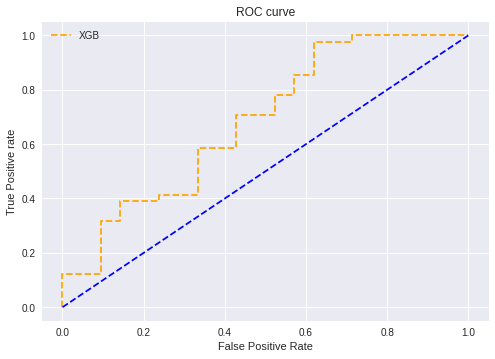

In [ ]:
from sklearn.metrics import roc_curve
model.fit(x_train_scaler,y_train)
pred_prob1 = xbc.predict_proba(x_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Auc roc score only contains model information not ensambel  technic 

# **Saving the model** 

In [ ]:
import pickle

filename = '/content/drive/MyDrive/datatrained/Loan_predict/model.sav'
pickle.dump(model, open(filename, 'wb'))

# **Conclusion**

In [ ]:

filename = '/content/drive/MyDrive/datatrained/Loan_predict/model.sav'
model = pickle.load(open(filename, 'rb'))

In [ ]:
y_pred = esy_ens(model,x,y,x,y)

[[144  48]
 [ 80 342]]
0.7915309446254072
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69       192
         1.0       0.88      0.81      0.84       422

    accuracy                           0.79       614
   macro avg       0.76      0.78      0.77       614
weighted avg       0.80      0.79      0.80       614



In [ ]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Loan_Status,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
